In [83]:
# In any of your project files
from my_imports import *

## New code: Linear Regression Forecasting Code (2018–2024) 

In [85]:
# Load preprocessed data (already saved by my notebook)
df = pd.read_csv('var/ERCOT+Weather_2024_data_interpolated.csv', parse_dates=['timestamp'])

In [86]:
df

,timestamp,tmpc_1,relh_1,sped_1,feel_1,tmpc_2,relh_2,sped_2,feel_2,tmpc_3,relh_3,sped_3,feel_3,ERCOT
0,2024-01-01 00:00:00,13.780000,100.000000,0.000000,56.800000,5.666667,75.443333,7.666667,37.410000,13.000000,100.00,1.150000,55.400000,41621.968883
1,2024-01-01 01:00:00,12.500000,100.000000,3.066667,54.500000,4.000000,75.160000,8.625000,33.270000,13.000000,100.00,2.300000,55.400000,41223.480177
2,2024-01-01 02:00:00,12.350000,100.000000,2.683333,54.233333,3.000000,80.650000,7.283333,31.866667,12.666667,100.00,2.683333,54.800000,41479.399746
3,2024-01-01 03:00:00,12.406667,100.000000,3.833333,54.333333,2.000000,80.510000,7.666667,29.403333,12.666667,100.00,0.000000,54.800000,41472.770126
4,2024-01-01 04:00:00,12.390000,100.000000,2.300000,54.300000,1.666667,82.503333,7.666667,28.723333,13.000000,100.00,0.000000,55.400000,41477.440791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2024-12-31 19:00:00,15.983333,44.713333,4.983333,60.766667,7.166667,79.556667,0.000000,44.900000,11.000000,76.34,6.900000,51.800000,48175.877538
8779,2024-12-31 20:00:00,14.853333,54.446667,4.216667,58.733333,5.853333,84.753333,0.000000,42.533333,9.666667,83.50,6.516667,48.346667,47619.264355
8780,2024-12-31 21:00:00,13.370000,63.366667,5.366667,56.066667,6.353333,79.370000,3.450000,41.760000,9.000000,87.28,7.666667,44.700000,46737.678611
8781,2024-12-31 22:00:00,12.166667,64.966667,4.600000,53.900000,6.150000,78.033333,2.300000,41.920000,8.666667,89.32,12.266667,42.890000,45775.649767


In [87]:
# Features and Target
features = [
    'tmpc_1', 'relh_1', 'sped_1', 'feel_1',
    'tmpc_2', 'relh_2', 'sped_2', 'feel_2',
    'tmpc_3', 'relh_3', 'sped_3', 'feel_3'
]

In [88]:
target = 'ERCOT'
X = df[features]
y = df[target]

In [89]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [90]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [91]:
# Evaluation metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    error_pct = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
    final_accuracy = 100 - error_pct
    return mae, rmse, error_pct, final_accuracy

mae, rmse, error_pct, final_accuracy = evaluate(y_test, y_pred_test)

print(f"🔹 Linear Regression Performance (Test Set):")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")
print(f"MAPE: {error_pct:.2f}% | Final Accuracy: {final_accuracy:.2f}%")

🔹 Linear Regression Performance (Test Set):
MAE: 5345.96 | RMSE: 6673.70
MAPE: 11.47% | Final Accuracy: 88.53%


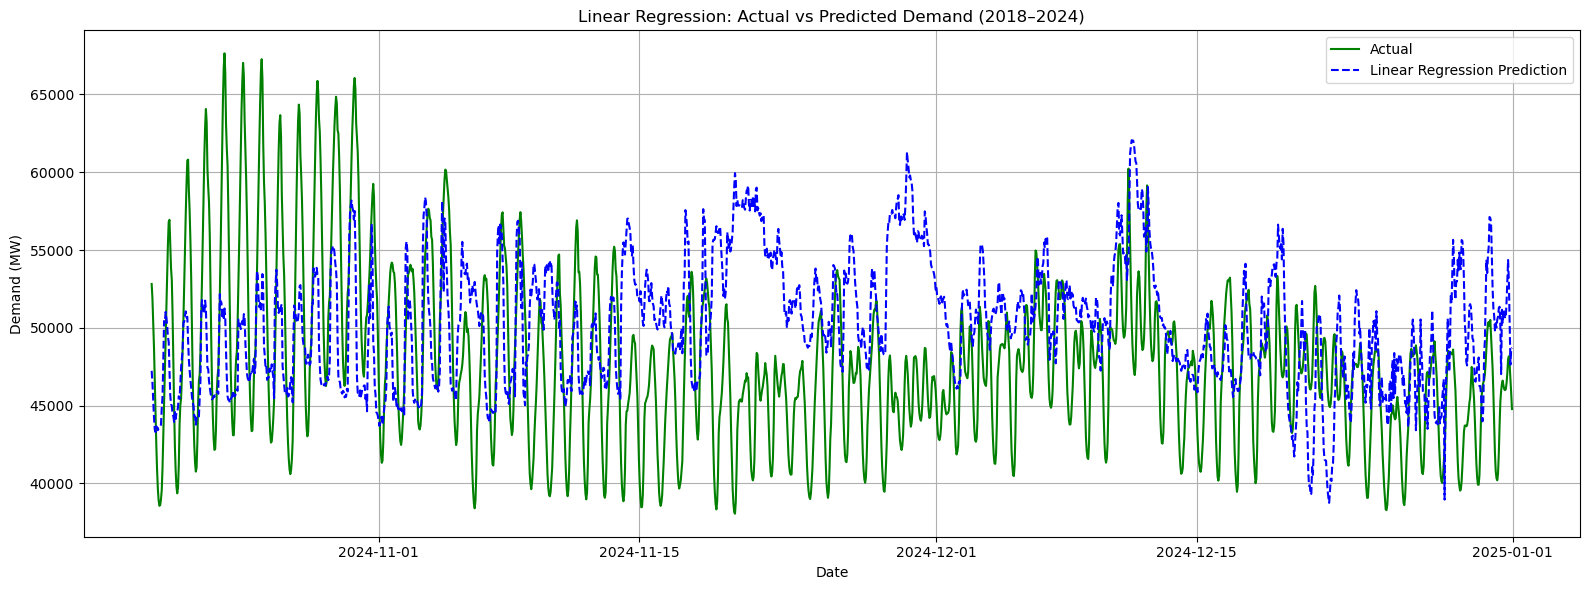

In [92]:
# Plot: Actual vs Predicted
test_dates = df['timestamp'][split_idx:]
plt.figure(figsize=(16, 6))
plt.plot(test_dates, y_test.values, label='Actual', color='green')
plt.plot(test_dates, y_pred_test, label='Linear Regression Prediction', color='blue', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Demand (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
# Save the model and scaler
joblib.dump(lr_model, 'var/models/linear_regression_model_ERCOT_2.joblib')
joblib.dump(scaler, 'var/models/linear_regression_scaler_ERCOT_2.joblib')

['var/models/linear_regression_scaler_ERCOT_2.joblib']

## Linear Regression Forecasting on 2024 Data

In [95]:
# Load 2024 data (follow same structure as training data)
df_2024 = pd.read_csv('var/ERCOT+Weather_2024_data_interpolated.csv', parse_dates=['timestamp'])

In [96]:
df_2024

,timestamp,tmpc_1,relh_1,sped_1,feel_1,tmpc_2,relh_2,sped_2,feel_2,tmpc_3,relh_3,sped_3,feel_3,ERCOT
0,2024-01-01 00:00:00,13.780000,100.000000,0.000000,56.800000,5.666667,75.443333,7.666667,37.410000,13.000000,100.00,1.150000,55.400000,41621.968883
1,2024-01-01 01:00:00,12.500000,100.000000,3.066667,54.500000,4.000000,75.160000,8.625000,33.270000,13.000000,100.00,2.300000,55.400000,41223.480177
2,2024-01-01 02:00:00,12.350000,100.000000,2.683333,54.233333,3.000000,80.650000,7.283333,31.866667,12.666667,100.00,2.683333,54.800000,41479.399746
3,2024-01-01 03:00:00,12.406667,100.000000,3.833333,54.333333,2.000000,80.510000,7.666667,29.403333,12.666667,100.00,0.000000,54.800000,41472.770126
4,2024-01-01 04:00:00,12.390000,100.000000,2.300000,54.300000,1.666667,82.503333,7.666667,28.723333,13.000000,100.00,0.000000,55.400000,41477.440791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2024-12-31 19:00:00,15.983333,44.713333,4.983333,60.766667,7.166667,79.556667,0.000000,44.900000,11.000000,76.34,6.900000,51.800000,48175.877538
8779,2024-12-31 20:00:00,14.853333,54.446667,4.216667,58.733333,5.853333,84.753333,0.000000,42.533333,9.666667,83.50,6.516667,48.346667,47619.264355
8780,2024-12-31 21:00:00,13.370000,63.366667,5.366667,56.066667,6.353333,79.370000,3.450000,41.760000,9.000000,87.28,7.666667,44.700000,46737.678611
8781,2024-12-31 22:00:00,12.166667,64.966667,4.600000,53.900000,6.150000,78.033333,2.300000,41.920000,8.666667,89.32,12.266667,42.890000,45775.649767


In [97]:
# Define features
features = [
    'tmpc_1', 'relh_1', 'sped_1', 'feel_1',
    'tmpc_2', 'relh_2', 'sped_2', 'feel_2',
    'tmpc_3', 'relh_3', 'sped_3', 'feel_3'
]

In [98]:
# Load saved model and scaler
lr_model = joblib.load('var/models/linear_regression_model_ERCOT_2.joblib')
scaler = joblib.load('var/models/linear_regression_scaler_ERCOT_2.joblib')

In [99]:
# Scale 2024 features
X_2024_scaled = scaler.transform(df_2024[features])

# Predict
predictions_2024 = lr_model.predict(X_2024_scaled)

# Create result DataFrame
linear_pred_df = pd.DataFrame({
    'timestamp': df_2024['timestamp'],
    'linear_regression_pred': predictions_2024
})


In [100]:
# Save to CSV
linear_pred_df.to_csv('var/predictions/linear_regression_predictions_2024_updated_2.csv', index=False)
print("✅ Linear Regression predictions for 2024 saved to CSV.")

✅ Linear Regression predictions for 2024 saved to CSV.


In [101]:
linear_pred_df

,timestamp,linear_regression_pred
0,2024-01-01 00:00:00,41622.296373
1,2024-01-01 01:00:00,41385.917105
2,2024-01-01 02:00:00,41313.941646
3,2024-01-01 03:00:00,40251.821634
4,2024-01-01 04:00:00,40078.846050
...,...,...
8778,2024-12-31 19:00:00,52937.003729
8779,2024-12-31 20:00:00,50326.885979
8780,2024-12-31 21:00:00,47635.318413
8781,2024-12-31 22:00:00,48675.306763


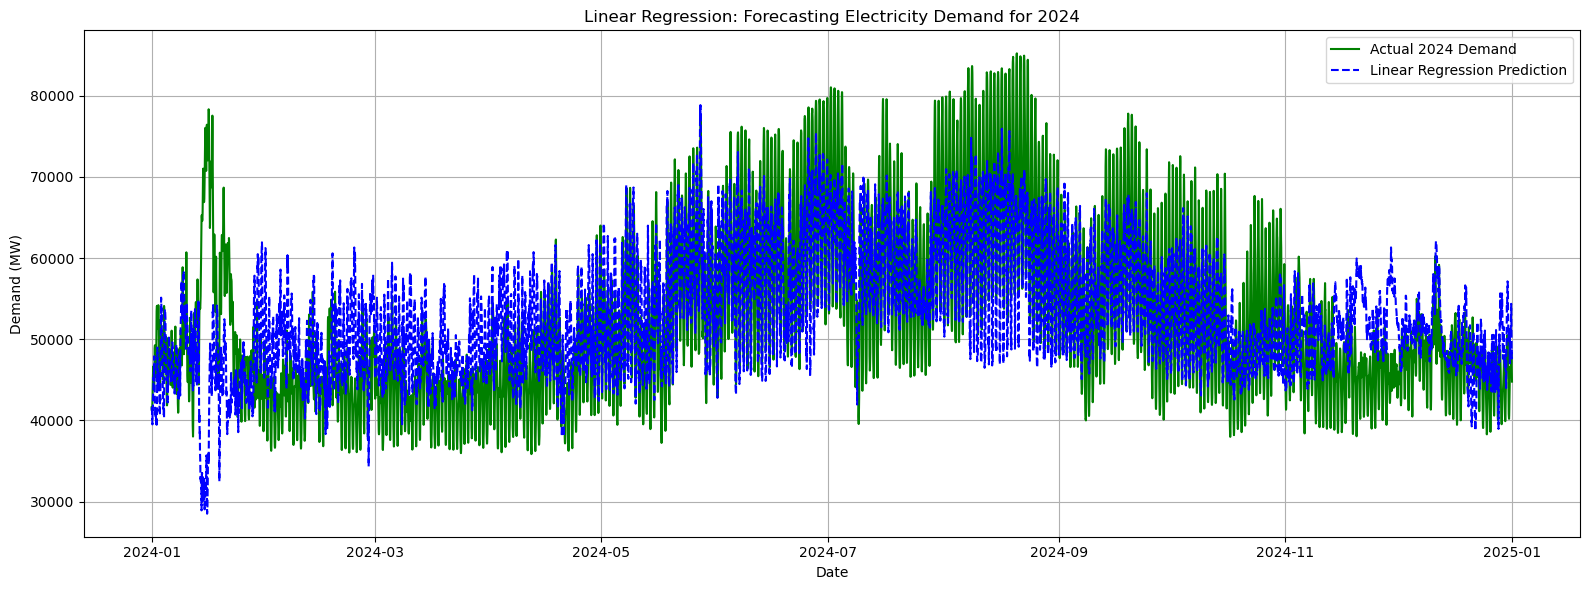

In [102]:
# Optional: Plot predictions vs actual
plt.figure(figsize=(16, 6))
plt.plot(df_2024['timestamp'], df_2024['ERCOT'], label='Actual 2024 Demand', color='green')
plt.plot(df_2024['timestamp'], predictions_2024, label='Linear Regression Prediction', linestyle='--', color='blue')
plt.title('Linear Regression: Forecasting Electricity Demand for 2024')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

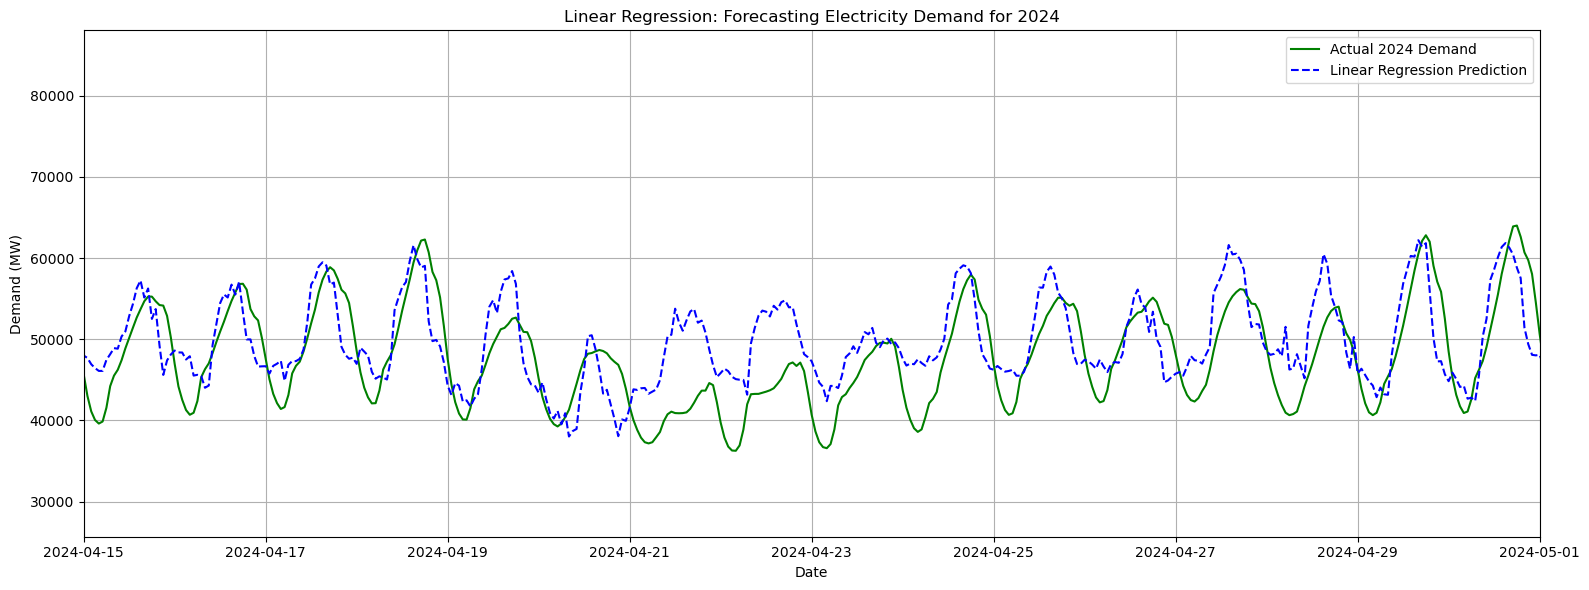

In [103]:
import datetime
# Optional: Plot predictions vs actual
plt.figure(figsize=(16, 6))
plt.plot(df_2024['timestamp'], df_2024['ERCOT'], label='Actual 2024 Demand', color='green')
plt.plot(df_2024['timestamp'], predictions_2024, label='Linear Regression Prediction', linestyle='--', color='blue')
plt.title('Linear Regression: Forecasting Electricity Demand for 2024')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.xlim(datetime.datetime(2024, 4, 15), datetime.datetime(2024, 5, 1)) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
# Actual and predicted values
y_true_2024 = df_2024['ERCOT'].values
y_pred_2024 = predictions_2024

In [105]:
# Evaluation function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
    accuracy = 100 - mape
    return mae, rmse, mape, accuracy

# Run evaluation
mae_2024, rmse_2024, mape_2024, acc_2024 = evaluate(y_true_2024, y_pred_2024)

# Print results
print("Linear Regression Forecasting (2024) Evaluation Metrics:")
print(f"MAE: {mae_2024:.2f}")
print(f"RMSE: {rmse_2024:.2f}")
print(f"MAPE: {mape_2024:.2f}%")
print(f"Final Accuracy: {acc_2024:.2f}%")


Linear Regression Forecasting (2024) Evaluation Metrics:
MAE: 5817.07
RMSE: 7529.88
MAPE: 11.23%
Final Accuracy: 88.77%
